## Sumário

[Pontos do cubo](#pontos-do-cubo)

[Função XOR](#funcao-xor)

[Função seno](#funcao-seno)

[Padrões em um círculo](#padroes-circulo)

[Série temporal](#serie-temporal)

## Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Pontos do Cubo

A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital.

In [51]:
tf = np.array([True, False])
x = np.random.randint(2,size=(5000,3))
y = []
noise = 0.01

for x_i in x:
    if np.array_equal(np.array([0,0,0]), x_i):
        y.append([1,0,0,0,0,0,0,0])
    elif np.array_equal(np.array([0,0,1]), x_i):
        y.append([0,1,0,0,0,0,0,0])
    elif np.array_equal(np.array([0,1,0]), x_i):
        y.append([0,0,1,0,0,0,0,0])
    elif np.array_equal(np.array([0,1,1]), x_i):
        y.append([0,0,0,1,0,0,0,0])
    elif np.array_equal(np.array([1,0,0]), x_i):
        y.append([0,0,0,0,1,0,0,0])
    elif np.array_equal(np.array([1,0,1]), x_i):
        y.append([0,0,0,0,0,1,0,0])
    elif np.array_equal(np.array([1,1,0]), x_i):
        y.append([0,0,0,0,0,0,1,0])
    elif np.array_equal(np.array([1,1,1]), x_i):
        y.append([0,0,0,0,0,0,0,1])
y = np.array(y)
x = np.array([x_i-noise if np.random.choice(tf) else x_i for x_i in x])
y.shape, x.shape

((5000, 8), (5000, 3))

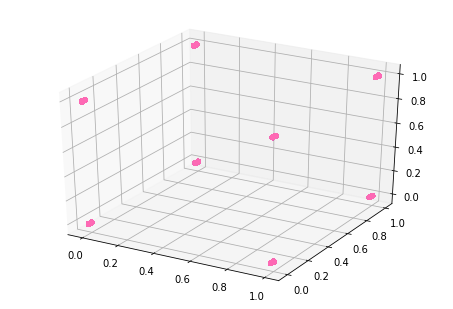

In [54]:
fig = plt.figure()
ax = Axes3D(fig)

x_vals, y_vals, z_vals = x[:,0], x[:,1], x[:,2]

ax.scatter(x_vals, y_vals, z_vals, c='hotpink')
plt.show()

In [55]:
np.savetxt('data/1a1X.txt', x, delimiter=',', fmt='%f')
np.savetxt('data/1a1Y.txt', y, delimiter=',', fmt='%f')

## Função XOR

A função XOR é definida pelo padrão

* 0 0 - 0
* 1 0 - 1
* 0 1 - 1
* 1 1 - 0

In [38]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

y.shape

(4, 1)

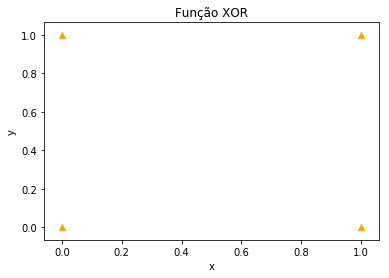

In [39]:
plt.title('Função XOR')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x[:,0],x[:,1], marker='^', c='orange')
plt.show()

In [40]:
np.savetxt('data/1a3aX.txt', x, delimiter=',', fmt='%d')
np.savetxt('data/1a3aY.txt', y, delimiter=',', fmt='%d')

## Função seno

A função é dada por: *f(x) = sen(πx)/πx  ,  0 ≤ x ≤ 4*

In [41]:
x = 4*np.random.random_sample((5000,)) - 4
y = [np.sin(np.pi*v)/np.pi*v for v in x]

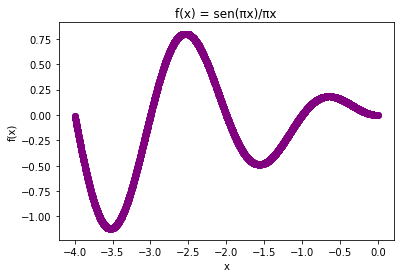

In [42]:
plt.title('f(x) = sen(πx)/πx')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(x, y, c='purple')
plt.show()

In [43]:
np.savetxt('data/1a3bX.txt', x, delimiter=',')
np.savetxt('data/1a3bY.txt', y, delimiter=',')

## Padrões em um círculo

A distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango.

In [44]:
x = np.array([p for p in 2*np.random.rand(10000,2)-1 if np.linalg.norm(p) < 1])

def labelPoint(p):
    c = [p[0] > 0, p[1] > 0, np.sum(np.abs(p)) > 1]
    return sum([int(c[i])*2**i for i in range(3)])   

y = [labelPoint(p) for p in x]
len(y)

7883

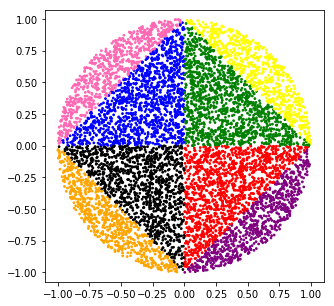

In [45]:
colors = { 0:'black', 1:'red', 2:'blue', 3:'green', 4:'orange', 5:'purple', 6:'hotpink', 7:'yellow' }

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], s = 3, c=[colors[yp] for yp in y])
plt.axis('equal')
plt.show()

In [46]:
np.savetxt('data/1a4X.txt', x, delimiter=',')
np.savetxt('data/1a4Y.txt', np.array(y).astype(np.int), fmt='%d', delimiter=',')

## Série temporal

*x(n) = sen(n sen²(n))*

In [47]:
x = np.linspace(-5, 5, 5000).reshape(-1, 1)
y = np.sin(x + np.sin(x)**2).reshape(-1, 1)
x.shape, y.shape

((5000, 1), (5000, 1))

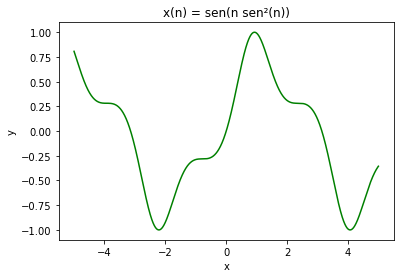

In [48]:
plt.title('x(n) = sen(n sen²(n))')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, c='green')
plt.show()

In [49]:
np.savetxt('data/1a5X.txt', x, delimiter=',')
np.savetxt('data/1a5Y.txt', y, delimiter=',')